<a href="https://colab.research.google.com/github/tlsdmswn01/NLP_Project---Audio/blob/main/%EC%9A%B4%EC%9C%A8%EC%9D%98%20%EC%9C%A0%EC%B0%BD%EC%84%B1%20%EC%A0%90%EC%88%98%20%EB%AA%A8%EB%8D%B8%EB%A7%81/%EC%9A%B4%EC%9C%A8%EC%9D%98_%EC%9C%A0%EC%B0%BD%EC%84%B1_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
with open("/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/chromagram_list.pkl'","rb") as f:
    padding_chromagram_list = pickle.load(f) #shape 가 (12,600)
with open("/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/pro_score_list.pkl'","rb") as f:
    pro_score_list = pickle.load(f)

In [ ]:
padding_chromagram_list[5].shape

(12, 600)

# 데이터 전처리 및 EDA

In [ ]:
import numpy as np

chromagram_np= np.array(padding_chromagram_list)
pro_score_list_np= np.array(pro_score_list)

print(chromagram_np.shape,pro_score_list_np.shape)

(6896, 12, 600) (6896,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

chromagram_np=chromagram_np.reshape((6896 ,12*600))

scaler = MinMaxScaler()
scaler.fit_transform(chromagram_np)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 딥러닝 모델 *돌려보기*

### Loss와 MSE그래프 그리는 함수 - 회귀모델

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history_dict):
    loss= history_dict['loss']
    val_loss=history_dict['val_loss']

    epochs=range(1, len(loss)+1)
    fig = plt.figure(figsize=(14,5))

    ax1=fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--', label= 'train_loss')
    ax1.plot(epochs,val_loss,'r:', label= 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc= history_dict['mse']
    val_acc=history_dict['val_mse']

    ax2=fig.add_subplot(1,2,2)
    ax2.plot(epochs,acc,'b--', label= 'train_mse')
    ax2.plot(epochs,val_acc,'r:', label= 'val_mse')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()

### Loss와 Acc그래프 그리는 함수 - 분류모델

In [ ]:
import matplotlib.pyplot as plt
def plot_history_class(history_dict):
    loss= history_dict['loss']
    val_loss=history_dict['val_loss']

    epochs=range(1, len(loss)+1)
    fig = plt.figure(figsize=(14,5))

    ax1=fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--', label= 'train_loss')
    ax1.plot(epochs,val_loss,'r:', label= 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc= history_dict['acc']
    val_acc=history_dict['val_acc']

    ax2=fig.add_subplot(1,2,2)
    ax2.plot(epochs,acc,'b--', label= 'train_acc')
    ax2.plot(epochs,val_acc,'r:', label= 'val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()

## 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(chromagram_np,pro_score_list_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_x.shape)

(5516, 7200)
(1380, 7200)
(5516,)
(1380, 7200)


### DNN 모델링

In [ ]:
from keras.layers import Input,Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def regression_model_build():
    model = Sequential()

    input_layer = Input(shape=(7200,), name='input')
    hidden1 = Dense(512, activation='relu', name='hidden1')(input_layer)
    hidden2 = Dense(256, activation='relu', name='hidden2')(hidden1)
    hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
    output_layer = Dense(1, activation='linear', name='output')(hidden3)  # 회귀 모델의 출력 레이어

    regression_model = Model(inputs=[input_layer], outputs=output_layer)
    regression_model.compile(optimizer='adam',
                             loss='mean_squared_error',  # MSE 손실 함수 사용
                             metrics=['mse'])  # 회귀 모델에서 주로 사용되는 평가 지표

    return regression_model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 7200)]            0         
                                                                 
 hidden1 (Dense)             (None, 512)               3686912   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 3851265 (14.69 MB)
Trainable params: 3851265 (14.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


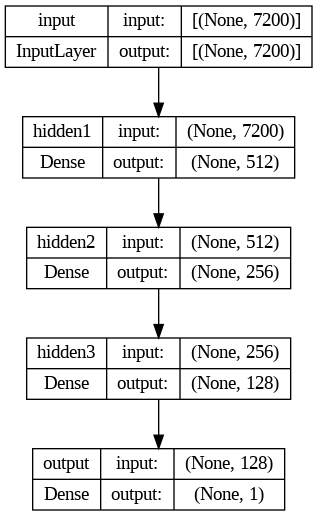

In [ ]:
model= regression_model_build()
model.summary()

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
history=model.fit(train_x,train_y,epochs=10,batch_size=8,validation_split=0.2)


Epoch 1/10
552/552 [==============================] - 10s 6ms/step - loss: 1.1109 - mse: 1.1109 - val_loss: 0.8700 - val_mse: 0.8700
Epoch 2/10
552/552 [==============================] - 3s 5ms/step - loss: 0.8251 - mse: 0.8251 - val_loss: 0.7879 - val_mse: 0.7879
Epoch 3/10
552/552 [==============================] - 3s 5ms/step - loss: 0.7975 - mse: 0.7975 - val_loss: 0.8396 - val_mse: 0.8396
Epoch 4/10
552/552 [==============================] - 2s 4ms/step - loss: 0.7452 - mse: 0.7452 - val_loss: 0.9690 - val_mse: 0.9690
Epoch 5/10
552/552 [==============================] - 2s 4ms/step - loss: 0.7096 - mse: 0.7096 - val_loss: 0.8411 - val_mse: 0.8411
Epoch 6/10
552/552 [==============================] - 2s 4ms/step - loss: 0.6830 - mse: 0.6830 - val_loss: 0.8141 - val_mse: 0.8141
Epoch 7/10
552/552 [==============================] - 2s 4ms/step - loss: 0.6690 - mse: 0.6690 - val_loss: 0.7746 - val_mse: 0.7746
Epoch 8/10
552/552 [==============================] - 3s 5ms/step - loss: 0

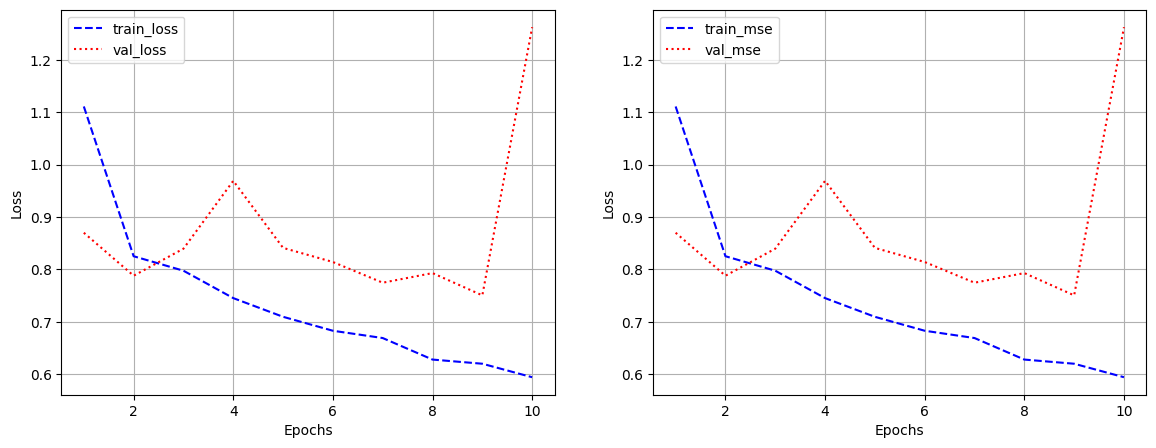

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y)

44/44 [==============================] - 0s 3ms/step - loss: 1.2510 - mse: 1.2510


[1.2510244846343994, 1.2510244846343994]

### CNN 모델링

In [ ]:
import pickle
with open("/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/chromagram_list600.pkl'","rb") as f:
    padding_chromagram_list600 = pickle.load(f) #shape 가 (12,600)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

chromagram_np600= np.array(padding_chromagram_list600)
pro_score_list_np= np.array(pro_score_list)
chromagram_np600=chromagram_np600.reshape((6896 ,12*600))
scaler = MinMaxScaler()
scaler.fit_transform(chromagram_np600)
chromagram_np600=chromagram_np600.reshape((6896 ,12,600))

train_x,test_x,train_y,test_y = train_test_split(chromagram_np600,pro_score_list_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5516, 12, 600)
(1380, 12, 600)
(5516,)
(1380,)


### 일반 CNN

In [ ]:
from keras.layers import Input,Conv2D,MaxPool2D, Flatten, BatchNormalization, Dropout, Bidirectional,  Reshape,LSTM,Dense,Attention,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def model_build():
    model=Sequential()

    input = Input(shape=(12,600,1))
    output= Conv2D(64,3, strides=1,padding='same',activation='relu')(input)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

    output= Conv2D(128,3, strides=1,padding='same',activation='relu')(output)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

    output= Conv2D(256,3, strides=1,padding='same',activation='relu')(output)
    output= MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)


    output=Flatten()(output)
    output=Dense(512,activation='relu')(output)
    output=Dense(256,activation='relu')(output)
    output=Dense(128,activation='relu')(output)

    output= Dense(1,activation='softmax')(output)


    model=Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',  # MSE 손실 함수 사용
                  metrics=['mse'])

    return model

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 600, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 12, 600, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 300, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 300, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 150, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 150, 256)       2951

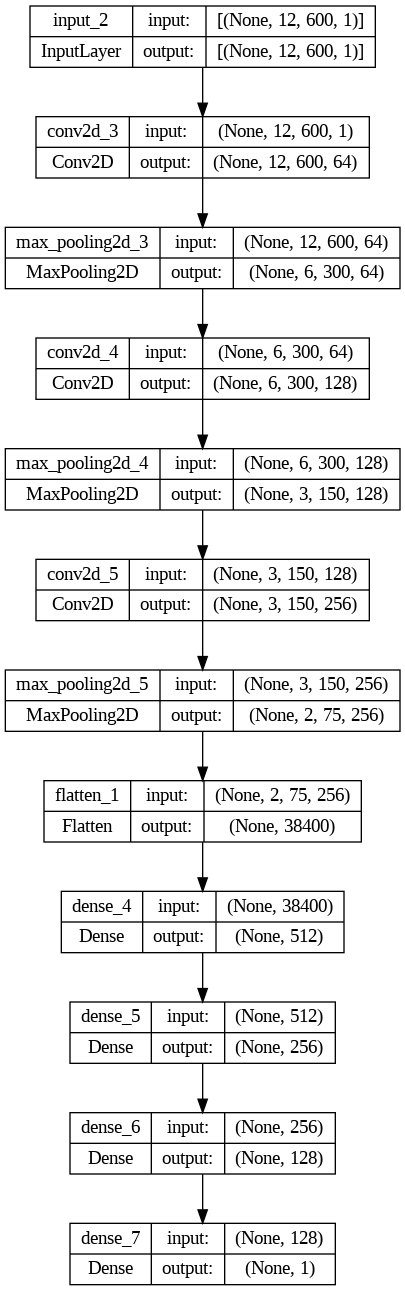

In [ ]:
model=model_build()
model.summary()

from tensorflow.keras.utils import plot_model

model=model_build()
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
history=model.fit(train_x,train_y,epochs=10,batch_size=128,validation_split=0.2)


Epoch 1/10
35/35 [==============================] - 12s 103ms/step - loss: 6.5377 - mse: 6.5377 - val_loss: 6.5491 - val_mse: 6.5491
Epoch 2/10
35/35 [==============================] - 2s 72ms/step - loss: 6.5377 - mse: 6.5377 - val_loss: 6.5491 - val_mse: 6.5491
Epoch 3/10
35/35 [==============================] - 2s 70ms/step - loss: 6.5377 - mse: 6.5377 - val_loss: 6.5491 - val_mse: 6.5491
Epoch 4/10
35/35 [==============================] - 3s 72ms/step - loss: 6.5377 - mse: 6.5377 - val_loss: 6.5491 - val_mse: 6.5491
Epoch 5/10
35/35 [==============================] - 3s 77ms/step - loss: 6.5377 - mse: 6.5377 - val_loss: 6.5491 - val_mse: 6.5491
Epoch 6/10
35/35 [==============================] - 3s 75ms/step - loss: 6.5377 - mse: 6.5377 - val_loss: 6.5491 - val_mse: 6.5491
Epoch 7/10
35/35 [==============================] - 2s 69ms/step - loss: 6.5377 - mse: 6.5377 - val_loss: 6.5491 - val_mse: 6.5491
Epoch 8/10
35/35 [==============================] - 3s 73ms/step - loss: 6.5377 -

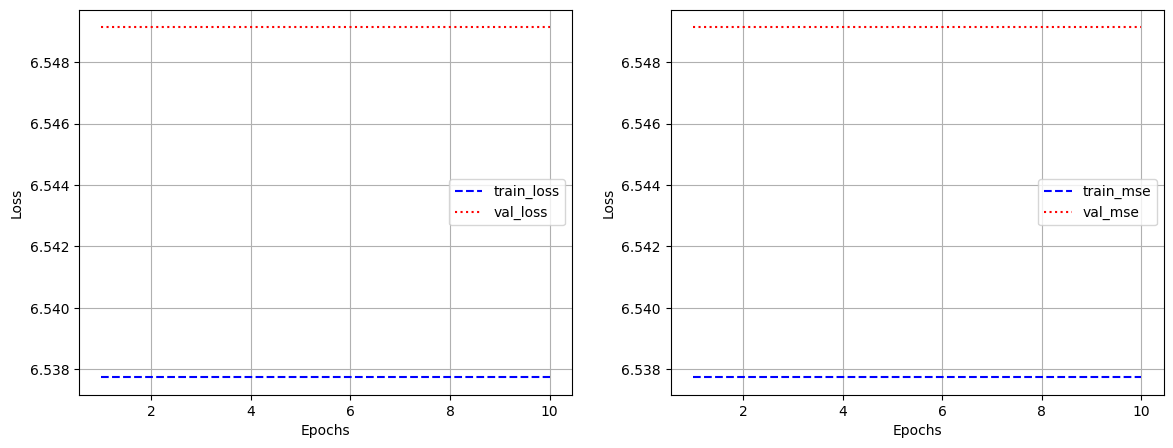

In [ ]:
plot_history(history.history)

### CNN-*LSTM*

#### 패딩 600으로 된것

##### 회귀모델

In [ ]:
import pickle
with open("/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/chromagram_list500.pkl'","rb") as f:
    padding_chromagram_list500 = pickle.load(f) #shape 가 (12,600)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

chromagram_np500= np.array(padding_chromagram_list500)
pro_score_list_np= np.array(pro_score_list)
chromagram_np500=chromagram_np500.reshape((6896 ,12*500))
scaler = MinMaxScaler()
scaler.fit_transform(chromagram_np500)
chromagram_np500=chromagram_np500.reshape((6896 ,12,500))

train_x,test_x,train_y,test_y = train_test_split(chromagram_np500,pro_score_list_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

NameError: ignored

| Layer Type         | Output Shape       |
|--------------------|--------------------|
| Input (InputLayer) | (500, 12, 1)       |
| Conv2D             | (500, 12, 64)      |
| Batch Normalization| (500, 12, 64)      |
| Max Pooling2D      | (250, 6, 64)       |
| Conv2D             | (250, 6, 64)       |
| Batch Normalization| (250, 6, 64)       |
| Max Pooling2D      | (125, 3, 64)       |
| Conv2D             | (125, 3, 256)      |
| Batch Normalization| (125, 3, 256)      |
| Max Pooling2D      | (62, 1, 256)       |
| Flatten            | (15,872)           |
| Reshape            | (8, 1,984)         |
| Bidirectional LSTM | (1,024)            |
| Batch Normalization| (1,024)            |
| Dense              | (128)              |
| Dense              | (1)                |


In [ ]:
from keras.layers import Input,Conv2D,MaxPool2D, Flatten, BatchNormalization, Dropout, Bidirectional,  Reshape,LSTM,Dropout,Dense,Attention,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def model_build():
    model=Sequential()

    input = Input(shape=(500,12,1))
    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(input)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)


    output= Conv2D(256,4, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output = Flatten()(output)
    output = Reshape((8, 1984))(output)
    output=Bidirectional(LSTM(512))(output)
    output = BatchNormalization()(output)

    output=Dense(128)(output)
    output= Dense(1,activation='linear')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mse'])

    return model


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 12, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 500, 12, 64)       640       
                                                                 
 batch_normalization (Batch  (None, 500, 12, 64)       256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 250, 6, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 6, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 250, 6, 64)        256 

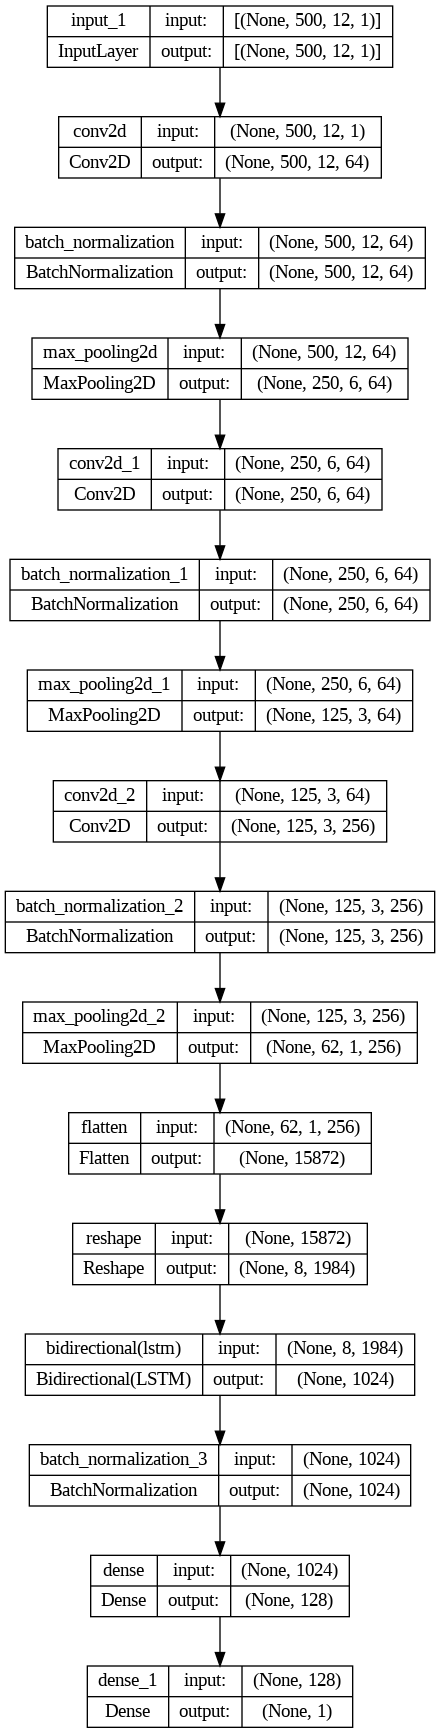

In [ ]:
from tensorflow.keras.utils import plot_model

model=model_build()
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
# epoch으로 인한 과적합 방지
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# 가장 성능이 좋은 시점에서 모델 저장
#mc = ModelCheckpoint('/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/운율의_유창성_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

x_train=train_x.reshape(5516,500,12)
history=model.fit(x_train,train_y,epochs=30,callbacks=[es],batch_size=512,validation_split=0.2)


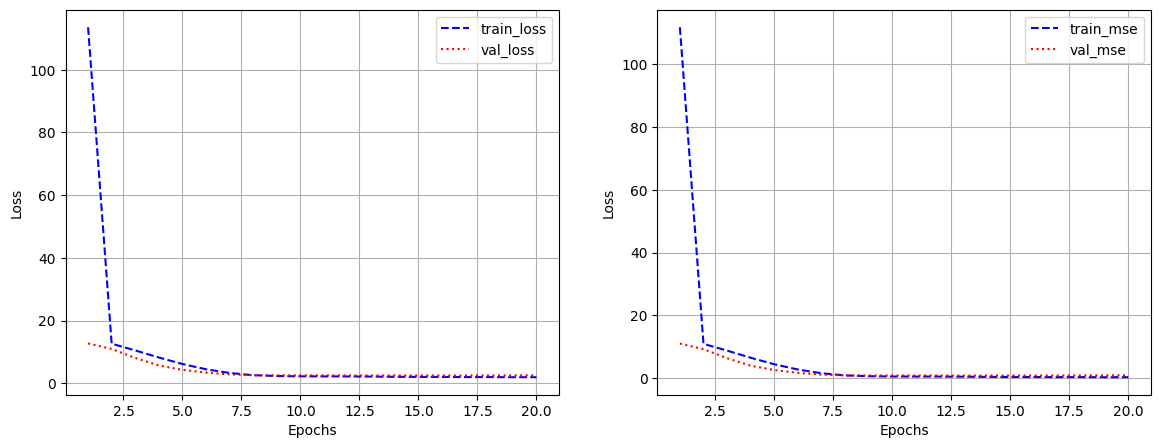

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y,verbose=1)

44/44 [==============================] - 2s 13ms/step - loss: 2.8745 - mse: 1.1870


[2.8745198249816895, 1.186987042427063]

In [ ]:
test_x.reshape(500,)
y_pred = model.predict(test_x)

# 실제값과 예측값 출력
for i in range(5):
    actual_value = test_y[i]
    predicted_value = y_pred[i]
    print(f"실제값: {actual_value}, 예측값: {predicted_value}")

ValueError: ignored

##### 분류모델

In [ ]:
def num_encoding(i):

    if i==1.0:
        i=0
    elif i==1.5:
        i=1
    elif i==2.0:
        i=2
    elif i==2.5:
        i=3

    elif i==3.0:
        i=4

    elif i==3.5:
        i=5
    elif i==4.0:
        i=6
    elif i==4.5:
        i=7
    elif i==5.0:
        i=8

    return i

pro_score_list1=list(map(num_encoding, pro_score_list))
pro_score_list_np1= np.array(pro_score_list1)

In [ ]:
from keras.utils import to_categorical
pro_score_list_np_cat=to_categorical(pro_score_list_np1)

In [ ]:
set(pro_score_list_np1)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [ ]:
pro_score_list_np_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(chromagram_np600,pro_score_list_np_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5516, 12, 600)
(1380, 12, 600)
(5516, 9)
(1380, 9)


In [ ]:
from keras.layers import Input,Conv2D,MaxPool2D, Flatten, BatchNormalization, Dropout, Bidirectional,  Reshape,LSTM,Dense,Attention,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def model_build():
    model=Sequential()

    input = Input(shape=(None,))
    embedding = Embedding(input_dim=21925, output_dim=100)(input)
    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(input)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)


    output= Conv2D(256,4, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output = Flatten()(output)
    output = Reshape((64, 300))(output)
    output=Bidirectional(LSTM(256))(output)
    output = BatchNormalization()(output)

    output=Dense(128)(output)
    output= Dense(9,activation='softmax')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    return model


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12, 600, 1)]      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 600, 64)       640       
                                                                 
 batch_normalization_4 (Bat  (None, 12, 600, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 300, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 300, 64)        36928     
                                                                 
 batch_normalization_5 (Bat  (None, 6, 300, 64)        256 

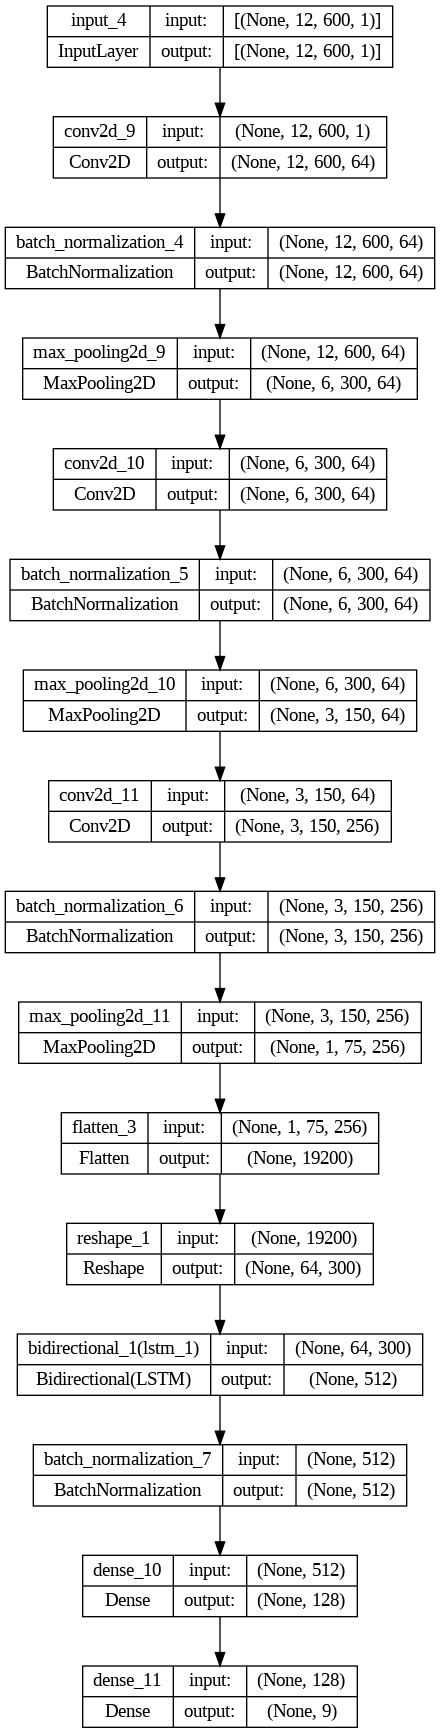

In [ ]:
from tensorflow.keras.utils import plot_model

model=model_build()
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
# epoch으로 인한 과적합 방지
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# 가장 성능이 좋은 시점에서 모델 저장
#mc = ModelCheckpoint('/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/운율의_유창성_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(train_x,train_y,epochs=50,callbacks=[es],batch_size=512,validation_split=0.2)


Epoch 1/50
9/9 [==============================] - 11s 468ms/step - loss: 4.4137 - acc: 0.1478 - val_loss: 3.7548 - val_acc: 0.1775
Epoch 2/50
9/9 [==============================] - 3s 375ms/step - loss: 3.7140 - acc: 0.2165 - val_loss: 3.6596 - val_acc: 0.1757
Epoch 3/50
9/9 [==============================] - 3s 364ms/step - loss: 3.4938 - acc: 0.2414 - val_loss: 3.6778 - val_acc: 0.1757
Epoch 4/50
9/9 [==============================] - 3s 363ms/step - loss: 3.3202 - acc: 0.2611 - val_loss: 3.7050 - val_acc: 0.1757
Epoch 5/50
9/9 [==============================] - 3s 377ms/step - loss: 3.1438 - acc: 0.2967 - val_loss: 3.8040 - val_acc: 0.1757
Epoch 6/50
9/9 [==============================] - 3s 380ms/step - loss: 2.9777 - acc: 0.3178 - val_loss: 3.8047 - val_acc: 0.1757
Epoch 7/50
9/9 [==============================] - 3s 383ms/step - loss: 2.7924 - acc: 0.3679 - val_loss: 3.8075 - val_acc: 0.1757
Epoch 7: early stopping


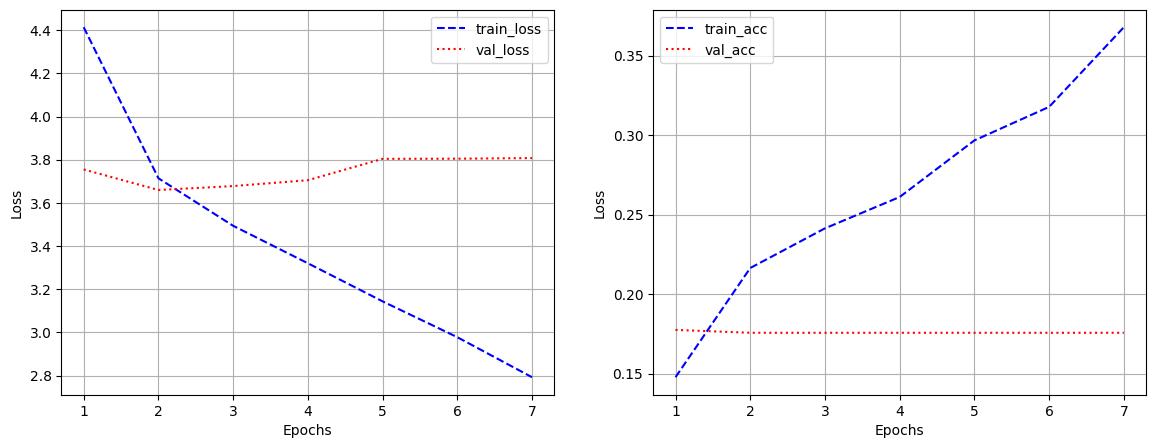

In [ ]:
plot_history_class(history.history)

In [ ]:
model.evaluate(test_x,test_y,verbose=1)

44/44 [==============================] - 0s 10ms/step - loss: 3.7259 - acc: 0.1732


[3.725904703140259, 0.17318840324878693]

In [ ]:
y_pred = model.predict(test_x)

# 실제값과 예측값 출력
for i in range(len(test_y)):
    actual_value = test_y[i]
    predicted_value = y_pred[i]
    print(f"실제값: {actual_value}, 예측값: {predicted_value}")

44/44 [==============================] - 1s 8ms/step
실제값: [0. 0. 0. 0. 0. 0. 0. 1. 0.], 예측값: [3.2545471e-05 2.4075773e-04 1.8215477e-03 1.1221842e-02 8.5536875e-02
 2.1682777e-01 4.2968056e-01 2.2514589e-01 2.9492205e-02]
실제값: [0. 0. 0. 0. 0. 1. 0. 0. 0.], 예측값: [3.2428179e-05 2.3977271e-04 1.8156478e-03 1.1256182e-02 8.5591726e-02
 2.1755424e-01 4.2879850e-01 2.2520559e-01 2.9505894e-02]
실제값: [0. 0. 0. 0. 0. 1. 0. 0. 0.], 예측값: [3.2500768e-05 2.1990731e-04 1.9750311e-03 1.0977957e-02 7.7389814e-02
 2.2240147e-01 4.2921275e-01 2.2482403e-01 3.2966603e-02]
실제값: [0. 0. 0. 1. 0. 0. 0. 0. 0.], 예측값: [3.2678417e-05 2.4056280e-04 1.8200781e-03 1.1270316e-02 8.5375644e-02
 2.1772254e-01 4.2724591e-01 2.2661801e-01 2.9674198e-02]
실제값: [0. 0. 0. 1. 0. 0. 0. 0. 0.], 예측값: [3.2657757e-05 2.2249567e-04 1.9832961e-03 1.1009716e-02 7.7854984e-02
 2.2178321e-01 4.3025076e-01 2.2431935e-01 3.2543555e-02]
실제값: [0. 0. 0. 0. 1. 0. 0. 0. 0.], 예측값: [3.2636151e-05 2.4168128e-04 1.8156616e-03 1.1211011e-02 8.537

#### 패딩 550으로 된 것

##### 회귀모델

In [ ]:
import pickle
with open("/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/chromagram_list550.pkl'","rb") as f:
    padding_chromagram_list550 = pickle.load(f) #shape 가 (12,550)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

chromagram_np550= np.array(padding_chromagram_list550)
pro_score_list_np= np.array(pro_score_list)
chromagram_np550=chromagram_np550.reshape((6896 ,12*550))
scaler = MinMaxScaler()
scaler.fit_transform(chromagram_np550)
chromagram_np550=chromagram_np550.reshape((6896 ,12,550))

train_x,test_x,train_y,test_y = train_test_split(chromagram_np550,pro_score_list_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5516, 12, 550)
(1380, 12, 550)
(5516,)
(1380,)


In [ ]:
pro_score_list

[3.5,
 3.5,
 3.0,
 3.0,
 2.5,
 2.0,
 4.0,
 4.5,
 4.0,
 3.0,
 3.5,
 3.5,
 3.5,
 4.5,
 4.0,
 3.0,
 3.5,
 2.5,
 2.0,
 2.5,
 3.5,
 5.0,
 3.5,
 4.0,
 3.0,
 3.5,
 4.0,
 3.5,
 4.0,
 3.0,
 3.5,
 3.5,
 3.5,
 4.0,
 3.5,
 3.5,
 3.0,
 3.5,
 4.0,
 3.0,
 1.5,
 2.5,
 2.5,
 3.0,
 3.0,
 2.5,
 3.5,
 2.0,
 2.5,
 2.5,
 3.0,
 3.0,
 2.5,
 3.0,
 2.5,
 2.5,
 3.5,
 3.0,
 3.5,
 2.5,
 2.5,
 2.5,
 2.0,
 3.5,
 2.5,
 2.5,
 3.0,
 2.5,
 3.0,
 2.5,
 2.5,
 3.0,
 2.0,
 3.0,
 3.0,
 4.5,
 3.0,
 4.5,
 4.0,
 4.0,
 4.0,
 4.0,
 4.5,
 3.5,
 3.5,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 3.0,
 3.5,
 4.0,
 3.5,
 3.5,
 3.5,
 4.5,
 2.0,
 2.5,
 2.5,
 4.0,
 2.5,
 2.0,
 2.0,
 2.5,
 2.5,
 3.5,
 1.5,
 2.5,
 2.5,
 2.5,
 2.0,
 2.5,
 2.5,
 2.5,
 3.0,
 3.5,
 4.0,
 3.5,
 4.0,
 3.5,
 3.0,
 4.0,
 4.0,
 3.5,
 4.0,
 4.0,
 4.0,
 4.5,
 4.5,
 3.5,
 4.0,
 4.0,
 4.0,
 4.0,
 3.5,
 3.5,
 3.0,
 4.0,
 2.5,
 3.0,
 3.5,
 3.5,
 4.0,
 1.5,
 1.5,
 1.0,
 1.0,
 5.0,
 4.5,
 4.5,
 4.0,
 4.0,
 3.5,
 4.5,
 4.5,
 4.0,
 4.5,
 3.5,
 4.0

In [ ]:
from keras.layers import Input,Conv2D,MaxPool2D, Flatten, BatchNormalization, Dropout, Bidirectional,  Reshape,LSTM,Dense,Attention,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def model_build():
    model=Sequential()

    input = Input(shape=(12,550,1))
    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(input)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)


    output= Conv2D(256,4, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output = Flatten()(output)
    output = Reshape((64, 272))(output)
    output=Bidirectional(LSTM(256))(output)
    output = BatchNormalization()(output)

    output=Dense(128)(output)
    output= Dense(1,activation='linear')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mse'])

    return model


Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_73 (InputLayer)       [(None, 12, 550, 1)]      0         
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 550, 64)       640       
                                                                 
 batch_normalization_45 (Ba  (None, 12, 550, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 6, 275, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 6, 275, 64)        36928     
                                                                 
 batch_normalization_46 (Ba  (None, 6, 275, 64)        256

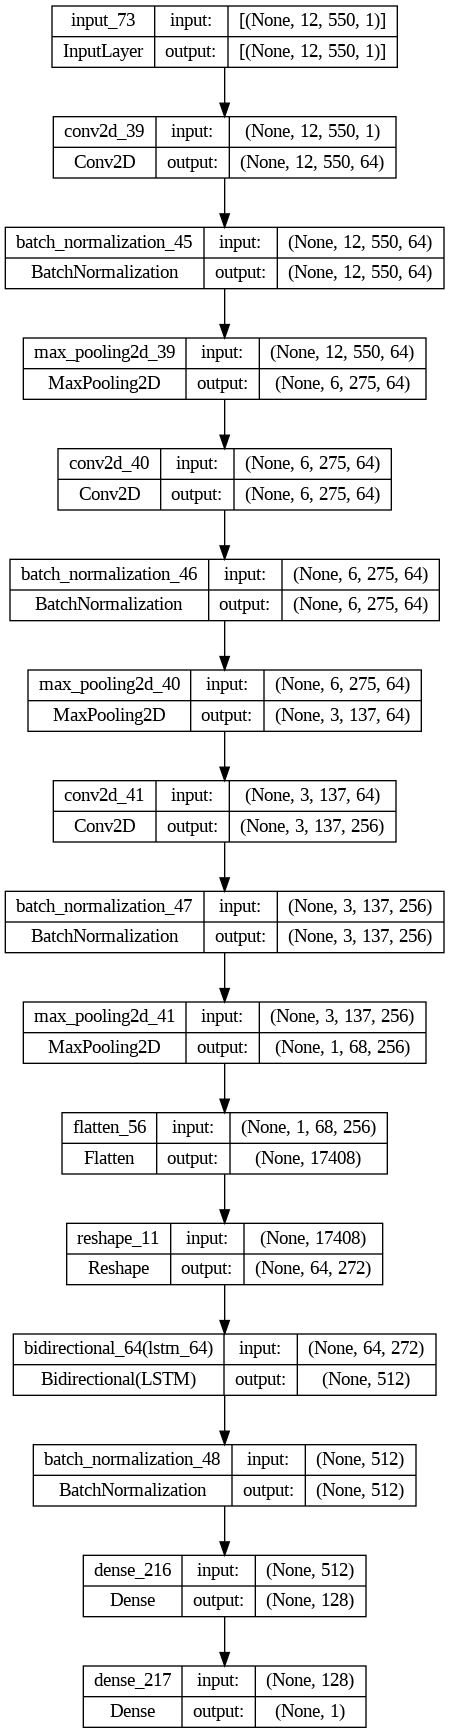

In [ ]:
from tensorflow.keras.utils import plot_model

model=model_build()
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
# epoch으로 인한 과적합 방지
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# 가장 성능이 좋은 시점에서 모델 저장
#mc = ModelCheckpoint('/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/운율의_유창성_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(train_x,train_y,epochs=50,callbacks=[es],batch_size=512,validation_split=0.2)


Epoch 1/50
9/9 [==============================] - 13s 600ms/step - loss: 17.5216 - mse: 15.8401 - val_loss: 11.0122 - val_mse: 9.3183
Epoch 2/50
9/9 [==============================] - 3s 350ms/step - loss: 9.5166 - mse: 7.8190 - val_loss: 5.2459 - val_mse: 3.5481
Epoch 3/50
9/9 [==============================] - 3s 390ms/step - loss: 4.7234 - mse: 3.0307 - val_loss: 2.7702 - val_mse: 1.0872
Epoch 4/50
9/9 [==============================] - 3s 357ms/step - loss: 2.5030 - mse: 0.8300 - val_loss: 8.2504 - val_mse: 6.5924
Epoch 5/50
9/9 [==============================] - 3s 356ms/step - loss: 2.6525 - mse: 1.0068 - val_loss: 7.0415 - val_mse: 5.4130
Epoch 6/50
9/9 [==============================] - 3s 366ms/step - loss: 2.2197 - mse: 0.6045 - val_loss: 6.2762 - val_mse: 4.6792
Epoch 6: early stopping


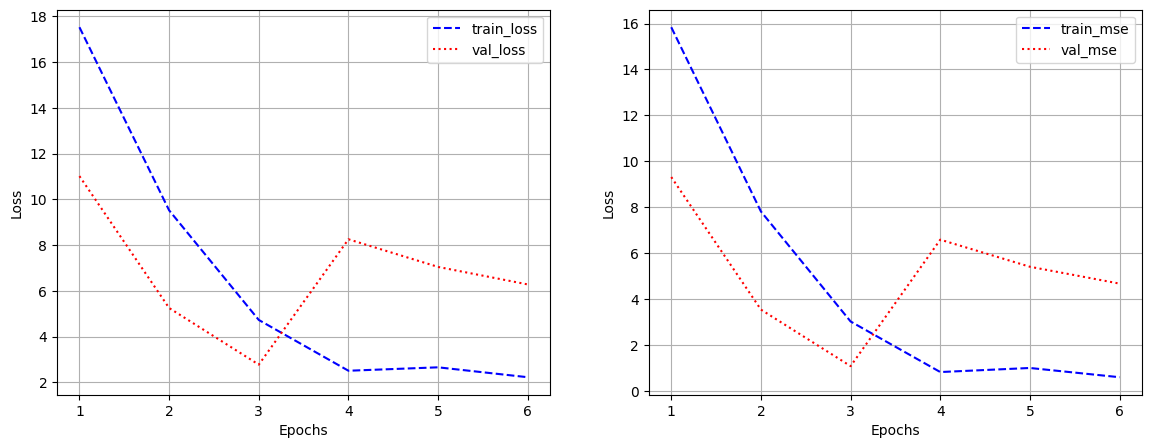

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y,verbose=1)

44/44 [==============================] - 0s 10ms/step - loss: 6.3306 - mse: 4.7336


[6.330578327178955, 4.733597278594971]

In [ ]:
y_pred = model.predict(test_x)

# 실제값과 예측값 출력
for i in range(len(test_y)):
    actual_value = test_y[i]
    predicted_value = y_pred[i]
    print(f"실제값: {actual_value}, 예측값: {predicted_value}")

#### 패딩 500으로 된 것

##### 회귀모델

In [ ]:
import pickle
with open("/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/chromagram_list500.pkl'","rb") as f:
    padding_chromagram_list500 = pickle.load(f) #shape 가 (12,500)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

chromagram_np500= np.array(padding_chromagram_list500)
pro_score_list_np= np.array(pro_score_list)
chromagram_np500=chromagram_np500.reshape((6896 ,12*500))
scaler = MinMaxScaler()
scaler.fit_transform(chromagram_np500)
chromagram_np500=chromagram_np500.reshape((6896 ,12,500))

train_x,test_x,train_y,test_y = train_test_split(chromagram_np500,pro_score_list_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5516, 12, 500)
(1380, 12, 500)
(5516,)
(1380,)


In [ ]:
pro_score_list_np

array([3.5, 3.5, 3. , ..., 2. , 3.5, 4. ])

In [ ]:
from keras.layers import Input,Conv2D,MaxPool2D, Flatten, BatchNormalization, Dropout, Bidirectional,  Reshape,LSTM,Dense,Attention,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def model_build():
    model=Sequential()

    input = Input(shape=(12,500,1))
    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(input)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)


    output= Conv2D(256,4, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output = Flatten()(output)
    output = Reshape((64, 248))(output)
    output=Bidirectional(LSTM(256))(output)
    output = BatchNormalization()(output)

    output=Dense(128)(output)
    output= Dense(1,activation='linear')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mse'])

    return model


Model: "model_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_74 (InputLayer)       [(None, 12, 500, 1)]      0         
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 500, 64)       640       
                                                                 
 batch_normalization_49 (Ba  (None, 12, 500, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 6, 250, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 6, 250, 64)        36928     
                                                                 
 batch_normalization_50 (Ba  (None, 6, 250, 64)        256

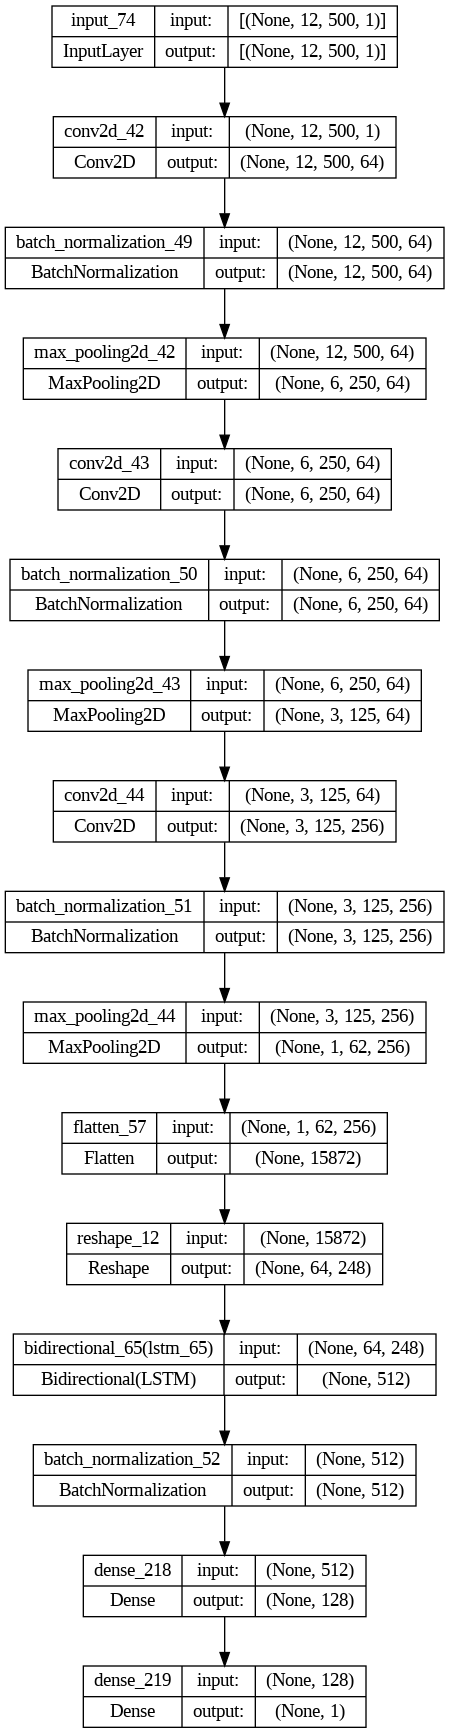

In [ ]:
from tensorflow.keras.utils import plot_model

model=model_build()
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
# epoch으로 인한 과적합 방지
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# 가장 성능이 좋은 시점에서 모델 저장
#mc = ModelCheckpoint('/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/운율의_유창성_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(train_x,train_y,epochs=50,callbacks=[es],batch_size=512,validation_split=0.2)


Epoch 1/50
9/9 [==============================] - 19s 467ms/step - loss: 20.3974 - mse: 18.7048 - val_loss: 12.4168 - val_mse: 10.7122
Epoch 2/50
9/9 [==============================] - 3s 337ms/step - loss: 10.3676 - mse: 8.6592 - val_loss: 11.5142 - val_mse: 9.8049
Epoch 3/50
9/9 [==============================] - 3s 338ms/step - loss: 6.2668 - mse: 4.5618 - val_loss: 9.5718 - val_mse: 7.8753
Epoch 4/50
9/9 [==============================] - 3s 338ms/step - loss: 2.8562 - mse: 1.1684 - val_loss: 7.8423 - val_mse: 6.1675
Epoch 5/50
9/9 [==============================] - 3s 353ms/step - loss: 2.6111 - mse: 0.9469 - val_loss: 10.6671 - val_mse: 9.0177
Epoch 6/50
9/9 [==============================] - 3s 329ms/step - loss: 2.3790 - mse: 0.7409 - val_loss: 16.6721 - val_mse: 15.0494
Epoch 7/50
9/9 [==============================] - 3s 335ms/step - loss: 2.2112 - mse: 0.5999 - val_loss: 22.2251 - val_mse: 20.6291
Epoch 8/50
9/9 [==============================] - 3s 355ms/step - loss: 2.2334

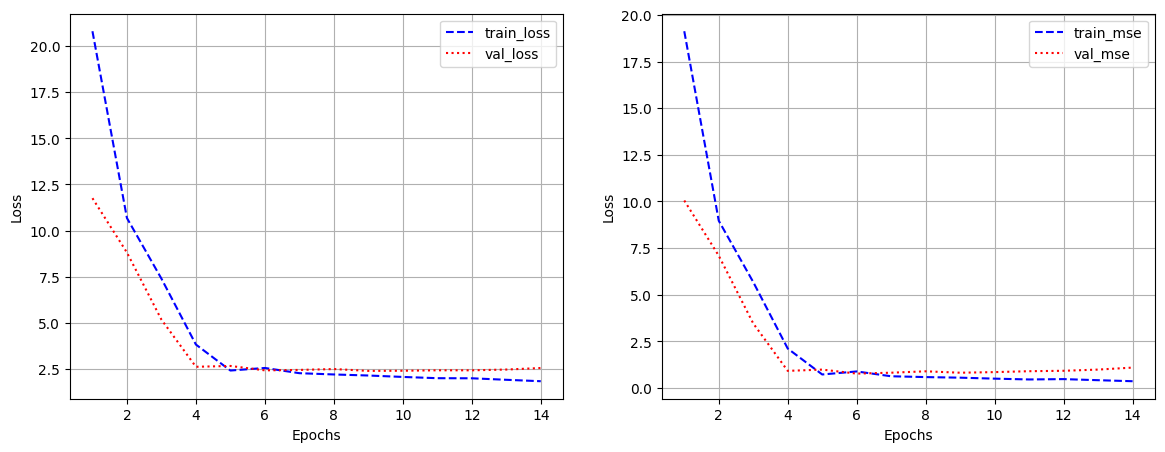

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y,verbose=1)

44/44 [==============================] - 1s 13ms/step - loss: 2.5511 - mse: 1.1006


[2.551149368286133, 1.100551724433899]

In [ ]:
y_pred = model.predict(test_x)

# 실제값과 예측값 출력
for i in range(len(test_y)):
    actual_value = test_y[i]
    predicted_value = y_pred[i]
    print(f"실제값: {actual_value}, 예측값: {predicted_value}")

44/44 [==============================] - 1s 8ms/step
실제값: 4.0, 예측값: [2.845128]
실제값: 4.5, 예측값: [2.8194773]
실제값: 3.5, 예측값: [2.8459213]
실제값: 2.0, 예측값: [2.8510346]
실제값: 4.0, 예측값: [2.867473]
실제값: 3.5, 예측값: [2.8385954]
실제값: 3.0, 예측값: [2.848403]
실제값: 4.0, 예측값: [2.8381932]
실제값: 3.0, 예측값: [2.8378642]
실제값: 2.5, 예측값: [2.8590267]
실제값: 3.0, 예측값: [2.8510528]
실제값: 3.0, 예측값: [2.8974366]
실제값: 3.5, 예측값: [2.8612564]
실제값: 3.0, 예측값: [2.8545973]
실제값: 4.0, 예측값: [2.8576345]
실제값: 4.5, 예측값: [2.680778]
실제값: 5.0, 예측값: [2.8539565]
실제값: 3.5, 예측값: [2.8582764]
실제값: 4.5, 예측값: [2.8622763]
실제값: 4.5, 예측값: [2.8344455]
실제값: 3.0, 예측값: [2.8404403]
실제값: 3.5, 예측값: [2.8639529]
실제값: 4.5, 예측값: [2.8465612]
실제값: 3.5, 예측값: [2.8299437]
실제값: 4.0, 예측값: [2.8830607]
실제값: 3.0, 예측값: [2.8514063]
실제값: 3.0, 예측값: [2.8520138]
실제값: 2.0, 예측값: [2.8432977]
실제값: 3.0, 예측값: [2.882064]
실제값: 4.5, 예측값: [2.862491]
실제값: 3.5, 예측값: [2.8640392]
실제값: 4.5, 예측값: [2.8746188]
실제값: 4.5, 예측값: [2.8721972]
실제값: 3.0, 예측값: [2.8569572]
실제값: 3.0, 예측값: [2.8440235]
실제값: 3.5

### CNN-LSTM +Attention

In [ ]:
#pro_score_list_np= np.array(pro_score_list)

In [ ]:
from keras.layers import Input,Conv2D,MaxPool2D, Flatten, BatchNormalization, Dropout, Bidirectional,  Reshape,LSTM,Dense,Attention,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def model_build():
    model=Sequential()

    input = Input(shape=(12,500,1))
    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(input)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output= Conv2D(64,3, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)


    output= Conv2D(256,4, strides=1,padding='same',activation='relu',kernel_regularizer=l2(0.01))(output)
    output=BatchNormalization()(output)
    output= MaxPool2D(pool_size=(2,2))(output)

    output = Flatten()(output)
    output = Reshape((64, 248))(output)
    attention = Attention()([output, output])
    output = Concatenate(axis=-1)([output, attention])
    output=Bidirectional(LSTM(256))(output)
    output = BatchNormalization()(output)



    output=Dense(128)(output)
    output= Dense(1,activation='linear')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mse'])

    return model


Model: "model_77"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_75 (InputLayer)       [(None, 12, 500, 1)]         0         []                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 12, 500, 64)          640       ['input_75[0][0]']            
                                                                                                  
 batch_normalization_53 (Ba  (None, 12, 500, 64)          256       ['conv2d_45[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_45 (MaxPooli  (None, 6, 250, 64)           0         ['batch_normalization_5

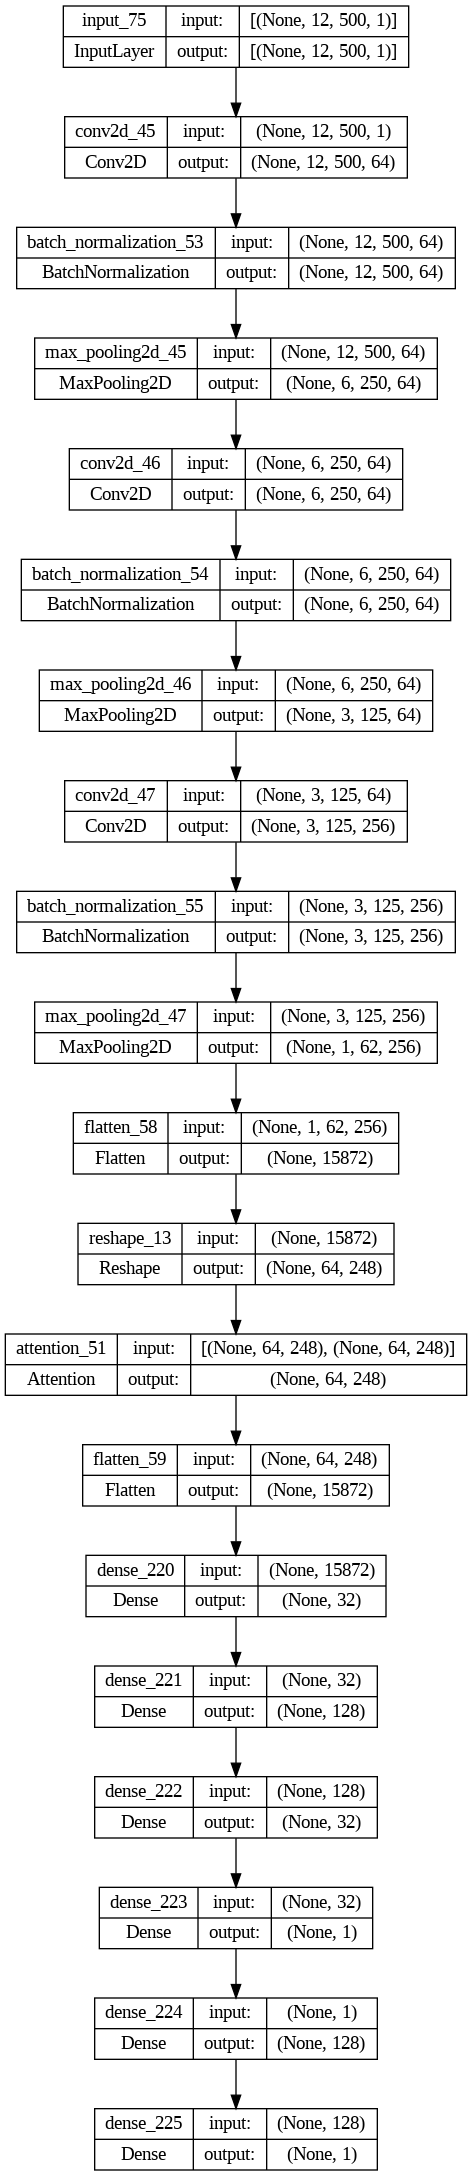

In [ ]:
from tensorflow.keras.utils import plot_model

model=model_build()
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
# epoch으로 인한 과적합 방지
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# 가장 성능이 좋은 시점에서 모델 저장
#mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(train_x,train_y,epochs=100,callbacks=[es],batch_size=512,validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 8s 301ms/step - loss: 6.4693 - mse: 4.8305 - val_loss: 12.9816 - val_mse: 11.3969
Epoch 2/100
9/9 [==============================] - 2s 264ms/step - loss: 2.4289 - mse: 0.8893 - val_loss: 13.1263 - val_mse: 11.6535
Epoch 3/100
9/9 [==============================] - 2s 266ms/step - loss: 2.1747 - mse: 0.7577 - val_loss: 12.9476 - val_mse: 11.6084
Epoch 4/100
9/9 [==============================] - 3s 288ms/step - loss: 1.9728 - mse: 0.6923 - val_loss: 13.1871 - val_mse: 11.9859
Epoch 5/100
9/9 [==============================] - 2s 271ms/step - loss: 1.8107 - mse: 0.6662 - val_loss: 13.2314 - val_mse: 12.1614
Epoch 6/100
9/9 [==============================] - 2s 268ms/step - loss: 1.6703 - mse: 0.6519 - val_loss: 13.1847 - val_mse: 12.2335
Epoch 7/100
9/9 [==============================] - 2s 268ms/step - loss: 1.5523 - mse: 0.6465 - val_loss: 13.1505 - val_mse: 12.3036
Epoch 8/100
9/9 [==============================] - 2s 269ms/step - lo

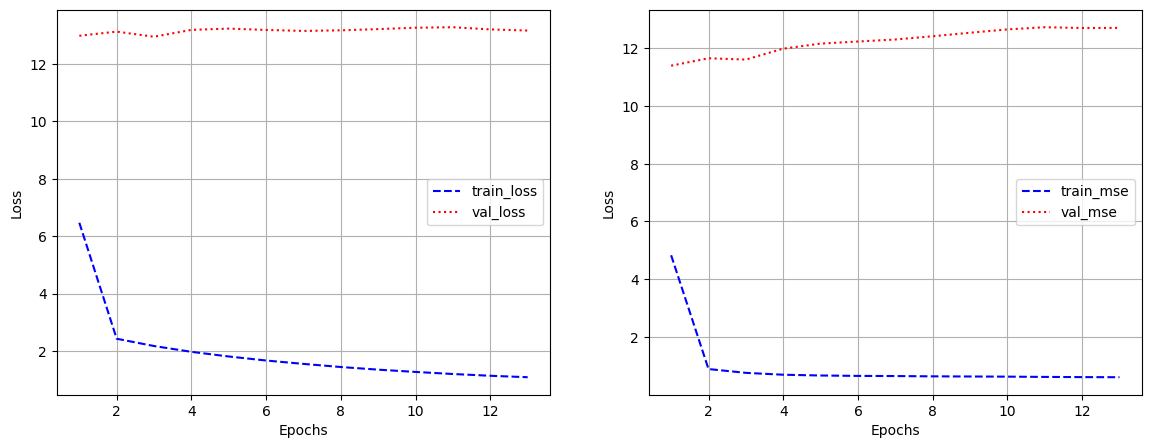

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y,verbose=1)

44/44 [==============================] - 0s 8ms/step - loss: 13.4624 - mse: 13.0045


[13.462401390075684, 13.004473686218262]

In [ ]:
y_pred = model.predict(test_x)

# 실제값과 예측값 출력
for i in range(len(test_y)):
    actual_value = test_y[i]
    predicted_value = y_pred[i]
    print(f"실제값: {actual_value}, 예측값: {predicted_value}")

### Lenet+LSTM

In [ ]:
from keras.layers import Input,Conv2D, Flatten, BatchNormalization, Dropout, Bidirectional, AveragePooling2D, Reshape,LSTM,Dense,Attention,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, Model
from keras.regularizers import l2

def model_build():
    model=Sequential()

    input = Input(shape=(12,500,1))
    output= Conv2D(6,5, strides=1,padding='same',activation='tanh',kernel_regularizer=l2(0.01))(input)
    output = BatchNormalization()(output)
    output= AveragePooling2D(pool_size=(2,2),padding='valid')(output)

    output= Conv2D(16,5, strides=1,activation='tanh',padding='valid',kernel_regularizer=l2(0.01))(output)
    output = BatchNormalization()(output)
    output= AveragePooling2D(pool_size=(2,2),padding='valid')(output)


    output= Conv2D(120,5, strides=1,padding='valid',activation='relu',kernel_regularizer=l2(0.01))(output)
    output = BatchNormalization()(output)
    output= AveragePooling2D(pool_size=(2,2))(output)

    output = Flatten()(output)
    output = Reshape((64, 248))(output)
    output=Bidirectional(LSTM(256))(output)
    output = BatchNormalization()(output)


    output=Dense(128)(output)
    output= Dense(1,activation='linear')(output)


    model=Model(inputs=[input],outputs=output)

    model = Model(inputs=[input],outputs=output)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mse'])

    return model

In [ ]:
# epoch으로 인한 과적합 방지
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# 가장 성능이 좋은 시점에서 모델 저장
#mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(train_x,train_y,epochs=100,callbacks=[es],batch_size=512,validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 3s 379ms/step - loss: 1.7718 - mse: 0.2922 - val_loss: 11.7979 - val_mse: 10.3293
Epoch 2/100
9/9 [==============================] - 3s 358ms/step - loss: 1.7288 - mse: 0.2683 - val_loss: 12.2255 - val_mse: 10.7759
Epoch 3/100
9/9 [==============================] - 3s 369ms/step - loss: 1.6733 - mse: 0.2317 - val_loss: 12.2982 - val_mse: 10.8673
Epoch 4/100
9/9 [==============================] - 3s 372ms/step - loss: 1.6235 - mse: 0.2006 - val_loss: 12.5107 - val_mse: 11.0985
Epoch 5/100
9/9 [==============================] - 3s 371ms/step - loss: 1.6057 - mse: 0.2014 - val_loss: 12.4013 - val_mse: 11.0077
Epoch 6/100
9/9 [==============================] - 3s 358ms/step - loss: 1.5731 - mse: 0.1873 - val_loss: 14.4124 - val_mse: 13.0372
Epoch 6: early stopping


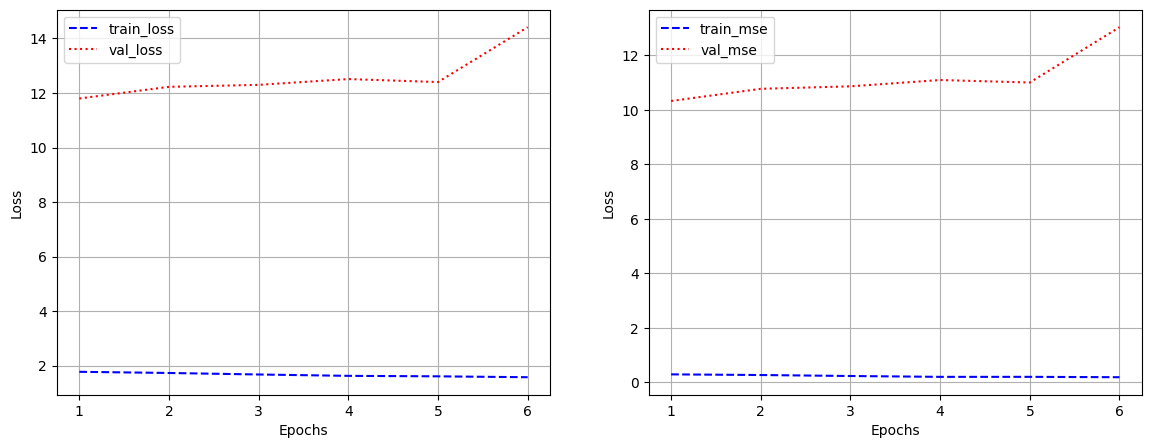

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y,verbose=1)

44/44 [==============================] - 0s 10ms/step - loss: 14.9426 - mse: 13.5673


[14.94255542755127, 13.567317962646484]

In [ ]:
y_pred = model.predict(test_x)

# 실제값과 예측값 출력
for i in range(len(test_y)):
    actual_value = test_y[i]
    predicted_value = y_pred[i]
    print(f"실제값: {actual_value}, 예측값: {predicted_value}")

44/44 [==============================] - 1s 9ms/step
실제값: 3.5, 예측값: [-0.07223447]
실제값: 2.0, 예측값: [-0.5384656]
실제값: 3.5, 예측값: [-0.0877886]
실제값: 3.0, 예측값: [-0.09029036]
실제값: 4.5, 예측값: [-0.05128964]
실제값: 5.0, 예측값: [-0.07665268]
실제값: 4.0, 예측값: [-0.04564188]
실제값: 5.0, 예측값: [-0.10439179]
실제값: 4.0, 예측값: [-0.09701616]
실제값: 3.0, 예측값: [-0.1283502]
실제값: 3.5, 예측값: [-0.11575436]
실제값: 3.0, 예측값: [-0.13031995]
실제값: 4.0, 예측값: [-0.08131899]
실제값: 3.0, 예측값: [-0.07251851]
실제값: 3.0, 예측값: [-0.07965609]
실제값: 4.5, 예측값: [-0.08358465]
실제값: 3.5, 예측값: [-0.09753538]
실제값: 2.0, 예측값: [-0.11251519]
실제값: 5.0, 예측값: [-0.75420994]
실제값: 5.0, 예측값: [-0.07765297]
실제값: 3.0, 예측값: [-0.5114269]
실제값: 1.0, 예측값: [-0.6665491]
실제값: 4.0, 예측값: [-0.06635025]
실제값: 3.5, 예측값: [-0.08438925]
실제값: 2.5, 예측값: [-0.0700754]
실제값: 3.5, 예측값: [-0.1002943]
실제값: 4.0, 예측값: [-0.19489753]
실제값: 3.0, 예측값: [-0.10369257]
실제값: 3.0, 예측값: [-0.13112]
실제값: 5.0, 예측값: [-0.03024075]
실제값: 3.0, 예측값: [-0.0878989]
실제값: 4.0, 예측값: [-0.12312984]
실제값: 3.0, 예측값: [-0.25700152]
실

#### 음성감정데이터베이스의 분석과 프레임 단위 특징과 발음단위 특징을 통합하는 Attention Mechanism을 이용한 음성 감정 인식 시스템의 개발 논문 모델 참고


##### 회귀모델

In [ ]:
import pickle
with open("/content/drive/Shareddrives/자연어 처리 프로젝트/발음평가/chromagram_list600.pkl'","rb") as f:
    padding_chromagram_list600 = pickle.load(f) #shape 가 (12,600)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

chromagram_np600= np.array(padding_chromagram_list600)
pro_score_list_np= np.array(pro_score_list)
chromagram_np600=chromagram_np600.reshape((6896 ,12*600))
scaler = MinMaxScaler()
scaler.fit_transform(chromagram_np600)
chromagram_np600=chromagram_np600.reshape((6896 ,12,600))

train_x,test_x,train_y,test_y = train_test_split(chromagram_np600,pro_score_list_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(5516, 12, 600)
(1380, 12, 600)
(5516,)
(1380,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Attention, Dense, Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Model


# BLSTM 레이어 정의
input_layer = Input(shape=(12,600))
blstm_layer = Bidirectional(LSTM(32, return_sequences=True))(input_layer)

# Attention 메커니즘 정의
attention_units = 32
attention_layer = Attention()([blstm_layer, blstm_layer])

# Utterance-level feature 추출 (HSF)
utterance_layer = Flatten()(attention_layer)
utterance_layer = Dense(32, activation='relu')(utterance_layer)


dnn_layer_1 = Dense(128, activation='relu')(utterance_layer)
dnn_layer_2 = Dense(32, activation='relu')(dnn_layer_1)
dnn_layer_3 = Dense(1,activation='linear')(dnn_layer_2)

# 모델 생성
model = Model(inputs=input_layer, outputs=dnn_layer_3)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])
# 모델 요약 정보 출력
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history=model.fit(train_x,train_y,epochs=100,callbacks=[es],batch_size=512,validation_split=0.2)



Model: "model_78"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_76 (InputLayer)       [(None, 12, 600)]            0         []                            
                                                                                                  
 bidirectional_66 (Bidirect  (None, 12, 64)               162048    ['input_76[0][0]']            
 ional)                                                                                           
                                                                                                  
 attention_52 (Attention)    (None, 12, 64)               0         ['bidirectional_66[0][0]',    
                                                                     'bidirectional_66[0][0]']    
                                                                                           

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Attention, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

def model_attention(input_shape):
    # Input
    input = Input(shape=(input_shape))

    # BLSTM
    output = Bidirectional(LSTM(32, return_sequences=True))(input)

    # Attentio
    attention_units = 32
    output = Attention()([output, output])

    # (HSF)
    output = Flatten()(output)
    output = Dense(32, activation='relu')(output)

    output = Dense(128, activation='relu')(output)
    output = Dense(32, activation='relu')(output)
    output = Dense(1, activation='linear')(output)


    model = Model(inputs=input, outputs=output)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mse'])

    return model

In [ ]:
input_shape = (12, 600)
model = model_attention(input_shape)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12, 600)]            0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 12, 64)               162048    ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 attention (Attention)       (None, 12, 64)               0         ['bidirectional[0][0]',       
                                                                     'bidirectional[0][0]']       
                                                                                              

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 12, 600)]            0         []                            
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 12, 64)               162048    ['input_2[0][0]']             
 onal)                                                                                            
                                                                                                  
 attention_1 (Attention)     (None, 12, 64)               0         ['bidirectional_1[0][0]',     
                                                                     'bidirectional_1[0][0]']     
                                                                                            

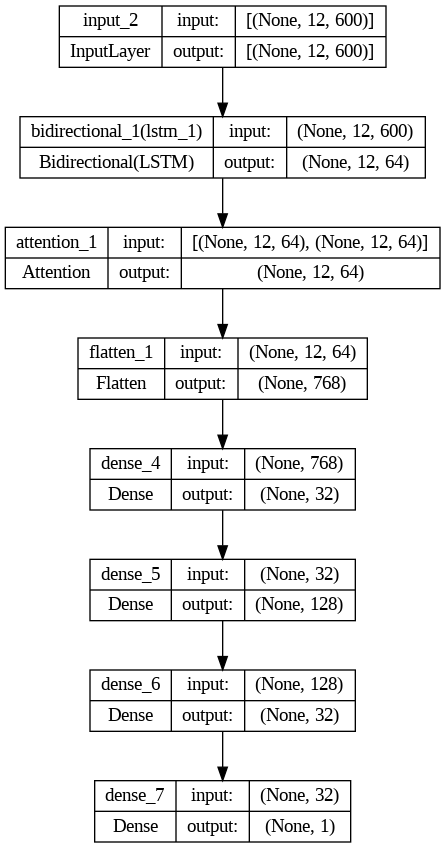

In [ ]:
from tensorflow.keras.utils import plot_model
model.summary()
plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(train_x, train_y, epochs=100, callbacks=[es], batch_size=512, validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 7s 134ms/step - loss: 4.9590 - mse: 4.9590 - val_loss: 1.7842 - val_mse: 1.7842
Epoch 2/100
9/9 [==============================] - 0s 23ms/step - loss: 1.1394 - mse: 1.1394 - val_loss: 0.8017 - val_mse: 0.8017
Epoch 3/100
9/9 [==============================] - 0s 23ms/step - loss: 0.8205 - mse: 0.8205 - val_loss: 0.7195 - val_mse: 0.7195
Epoch 4/100
9/9 [==============================] - 0s 27ms/step - loss: 0.7565 - mse: 0.7565 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 5/100
9/9 [==============================] - 0s 26ms/step - loss: 0.7250 - mse: 0.7250 - val_loss: 0.7145 - val_mse: 0.7145
Epoch 6/100
9/9 [==============================] - 0s 27ms/step - loss: 0.7192 - mse: 0.7192 - val_loss: 0.7398 - val_mse: 0.7398
Epoch 7/100
9/9 [==============================] - 0s 23ms/step - loss: 0.7156 - mse: 0.7156 - val_loss: 0.7013 - val_mse: 0.7013
Epoch 8/100
9/9 [==============================] - 0s 23ms/step - loss: 0.7043 - mse: 0.7

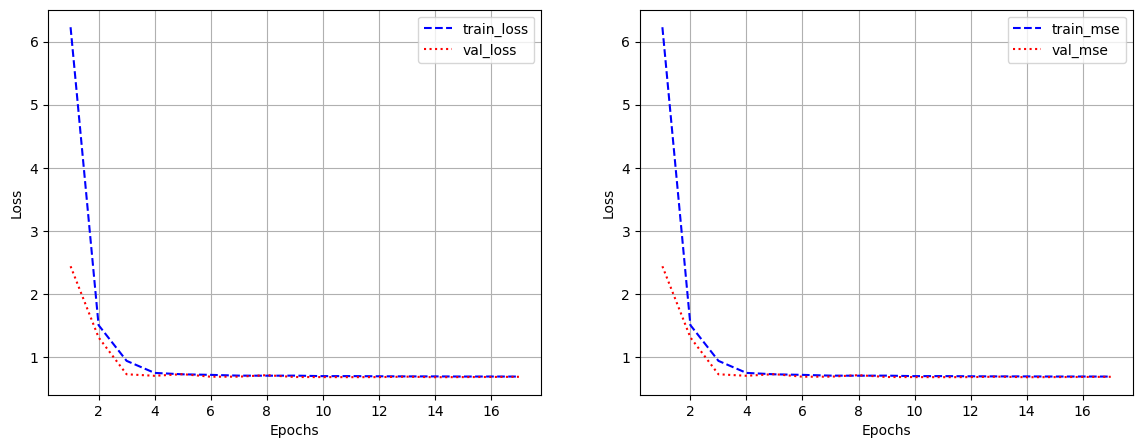

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x,test_y,verbose=1)

44/44 [==============================] - 0s 4ms/step - loss: 0.7103 - mse: 0.7103


[0.7103158831596375, 0.7103158831596375]

In [ ]:
y_pred = model.predict(test_x)

# 실제값과 예측값 출력
for i in range(len(test_y)):
    actual_value = test_y[i]
    predicted_value = y_pred[i]
    print(f"실제값: {actual_value}, 예측값: {predicted_value}")

44/44 [==============================] - 1s 3ms/step
실제값: 2.5, 예측값: [3.5817866]
실제값: 3.5, 예측값: [3.1246367]
실제값: 4.0, 예측값: [3.5140238]
실제값: 3.0, 예측값: [3.2548242]
실제값: 3.5, 예측값: [3.7088132]
실제값: 3.0, 예측값: [3.2434323]
실제값: 2.5, 예측값: [3.8352623]
실제값: 3.0, 예측값: [3.585463]
실제값: 4.5, 예측값: [3.5153677]
실제값: 3.5, 예측값: [3.7629552]
실제값: 3.5, 예측값: [3.580104]
실제값: 4.0, 예측값: [3.373597]
실제값: 4.0, 예측값: [3.670271]
실제값: 3.5, 예측값: [3.7361417]
실제값: 2.5, 예측값: [3.5669675]
실제값: 2.0, 예측값: [2.816855]
실제값: 4.5, 예측값: [3.6996655]
실제값: 2.5, 예측값: [3.2660732]
실제값: 4.0, 예측값: [3.5626864]
실제값: 2.5, 예측값: [2.9810562]
실제값: 2.5, 예측값: [3.2935605]
실제값: 2.0, 예측값: [3.3388562]
실제값: 3.0, 예측값: [3.7007113]
실제값: 3.0, 예측값: [3.810454]
실제값: 4.0, 예측값: [3.6261916]
실제값: 3.5, 예측값: [3.653688]
실제값: 2.5, 예측값: [3.6341324]
실제값: 2.5, 예측값: [3.397469]
실제값: 4.5, 예측값: [3.469819]
실제값: 4.0, 예측값: [3.3878176]
실제값: 4.5, 예측값: [3.1331558]
실제값: 4.0, 예측값: [3.3808942]
실제값: 2.5, 예측값: [3.5146031]
실제값: 4.0, 예측값: [3.3586783]
실제값: 3.5, 예측값: [3.236653]
실제값: 2.5, 예측

(array([ 15.,  23.,  81., 193., 287., 273., 254., 167.,  87.]),
 array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 <BarContainer object of 9 artists>)

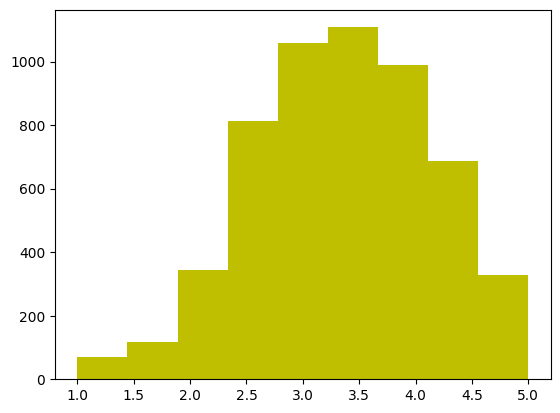

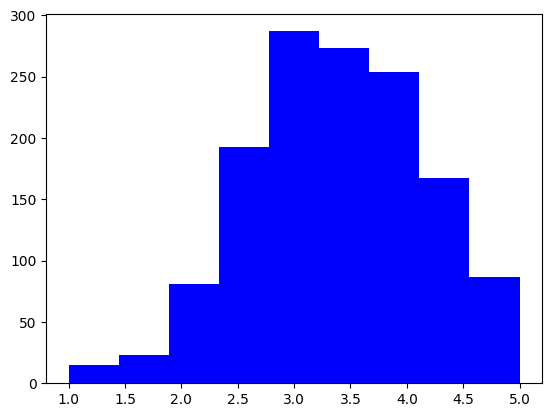

In [ ]:
# 왜도, 첨도 찍기..
import matplotlib.pyplot as plt

plt.figure()
plt.hist(train_y,bins=9, color='y') # 훈련 데이터 타겟
plt.figure()
plt.hist(test_y,bins=9,color='b') # 테스트 데이터 타겟

In [ ]:
from scipy.stats import skew, kurtosis
skewness = skew(train_y)
kurt = kurtosis(train_y) # 얼마나 중심에 데이터가 집중되어 있는가

In [ ]:
print(skewness) # 음수값이여서 왼쪽으로 치우쳐진 분포
print(kurt) # 첨도 값이 3에 가까우면 정규 분포와 같은 모양, 3보다 크면

-0.20800915982105994
-0.3960654197637936


| 실제값 | 예측값        |
|-------|--------------|
| 2.5   | 3.5817866    |
| 3.5   | 3.1246367    |
| 4.0   | 3.5140238    |
| 3.0   | 3.2548242    |
| 3.5   | 3.7088132    |
| 3.0   | 3.2434323    |
| 2.5   | 3.8352623    |
| 3.0   | 3.585463     |
| 4.5   | 3.5153677    |
| 3.5   | 3.7629552    |
| 3.5   | 3.580104     |
| 4.0   | 3.373597     |
| 4.0   | 3.670271     |